# Exercício de Sazonalidade (Transformada de Fourier)

**Autor:** Kelvin Henrique Vieira Pedroso
**Data:** 11/06/2025

A base "vendas_sazonal.csv" possui duas frequências mais importantes, uma de 60 e outra de 15 dias. Neste notebook faremos um exercício de como captar essas frequências pela Transformada de Fourier, como traduzir as frequências em período (no exercício em dias) e como visualizar as ondas puras de frequência no gráfico.

In [10]:
import seaborn as sns
import pandas as pd
import yfinance as yf
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from numpy.fft import fft, ifft, fftfreq

In [60]:
df = pd.read_csv('vendas_sazonal.csv')

## 1) Visualização da Base Original

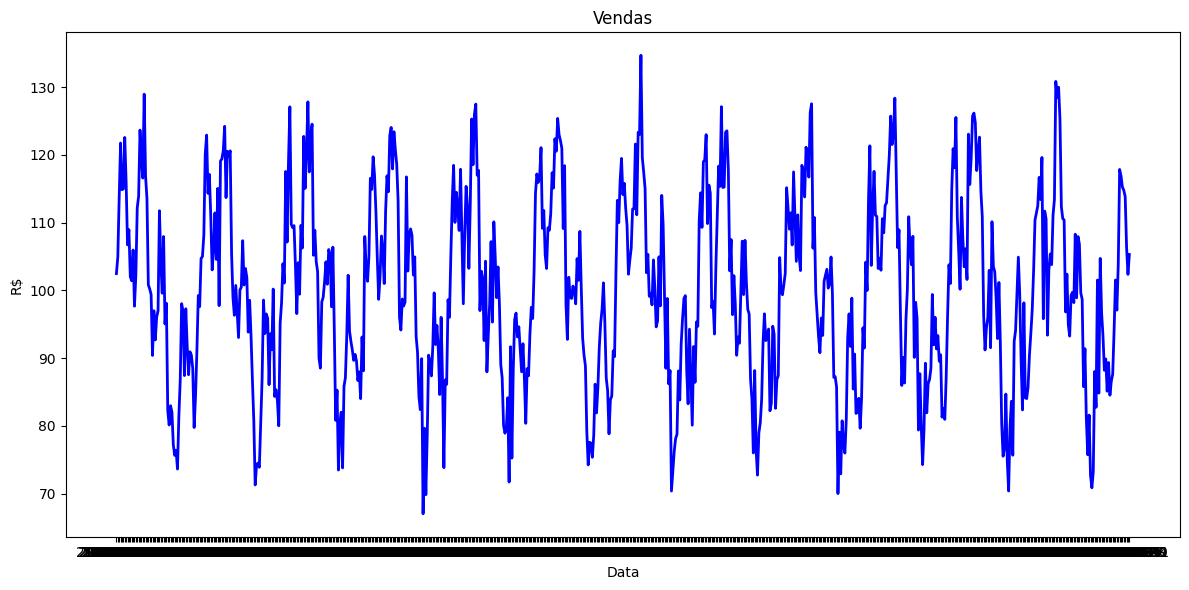

In [61]:
plt.figure(figsize=(12, 6))
plt.plot(df['data'], df['vendas'], color='blue', linewidth=2)
plt.title('Vendas')
plt.xlabel('Data')
plt.ylabel('R$')
plt.grid(False)
plt.tight_layout()
plt.show()

## 2) Gerando a Transformada de Fourier

**IMPORTANTE:** A base já está ordenada, portanto neste exercício não será necessário executar esta etapa, porém, é sempre importante ordenar os dados, no dataframe, ao longo do tempo.

In [ ]:
vendas = df["vendas"].values
n = len(vendas)
t = np.arange(n)

fft_vals = fft(vendas)
frequencies = fftfreq(n, d=1)  # d=1 para dados diários

# Ignorar a componente de frequência zero (tendência)
amplitudes = np.abs(fft_vals)
amplitudes[0] = 0

**[:n//2]** é uma fatia (slice) do array que pega apenas os primeiros 50% dos elementos. A primeira metade (índices 0 a n//2) representa as frequências positivas. As matrizes abaixo só contem a parte positiva.

In [ ]:
# Frequências e amplitudes (só parte positiva, descartando zero)
positive_freqs = frequencies[:n//2]
positive_amplitudes = amplitudes[:n//2]
positive_amplitudes[0] = 0

A parte abaixo nos permite visualizar as 5 frequências com maiores picos. No caso conseguimos confirmar que existem duas sazonalidades nos dados, uma com ~15 dias e outra com ~60 dias.

In [54]:
# Obter os 5 maiores picos
top_indices_viewer = positive_amplitudes.argsort()[-5:]
top_indices_viewer = top_indices_viewer[::-1]  # ordenar do maior para o menor

# Mostrar os períodos
for idx in top_indices_viewer:
    freq = positive_freqs[idx]
    periodo = 1 / freq
    print(f"Frequência: {freq:.4f} ciclos/dia → Período: {periodo:.2f} dias")

Frequência: 0.0164 ciclos/dia → Período: 60.92 dias
Frequência: 0.0670 ciclos/dia → Período: 14.92 dias
Frequência: 0.0178 ciclos/dia → Período: 56.23 dias
Frequência: 0.0657 ciclos/dia → Período: 15.23 dias
Frequência: 0.0150 ciclos/dia → Período: 66.45 dias


## 3) Visualizando as duas maiores frequências no gráfico

In [56]:
# Obter os 2 maiores picos
top_indices = positive_amplitudes.argsort()[-2:]
top_indices = top_indices[::-1]  # ordenar do maior para o menor

# Mostrar os períodos
for idx in top_indices:
    freq = positive_freqs[idx]
    periodo = 1 / freq
    print(f"Frequência: {freq:.4f} ciclos/dia → Período: {periodo:.2f} dias")

Frequência: 0.0164 ciclos/dia → Período: 60.92 dias
Frequência: 0.0670 ciclos/dia → Período: 14.92 dias


Abaixo estamos reconstruindo as duas ondas puras (a onda de freq de ~60 dias e a outra de ~15 dias).

In [ ]:
componentes = []
for idx in top_indices:
    comp_fft = np.zeros_like(fft_vals)
    comp_fft[idx] = fft_vals[idx]
    comp_fft[-idx] = fft_vals[-idx]  # manter simetria (parte negativa)
    comp_signal = np.real(ifft(comp_fft))
    componentes.append(comp_signal)

Abaixo plotamos o gráfico das duas principais frequências.

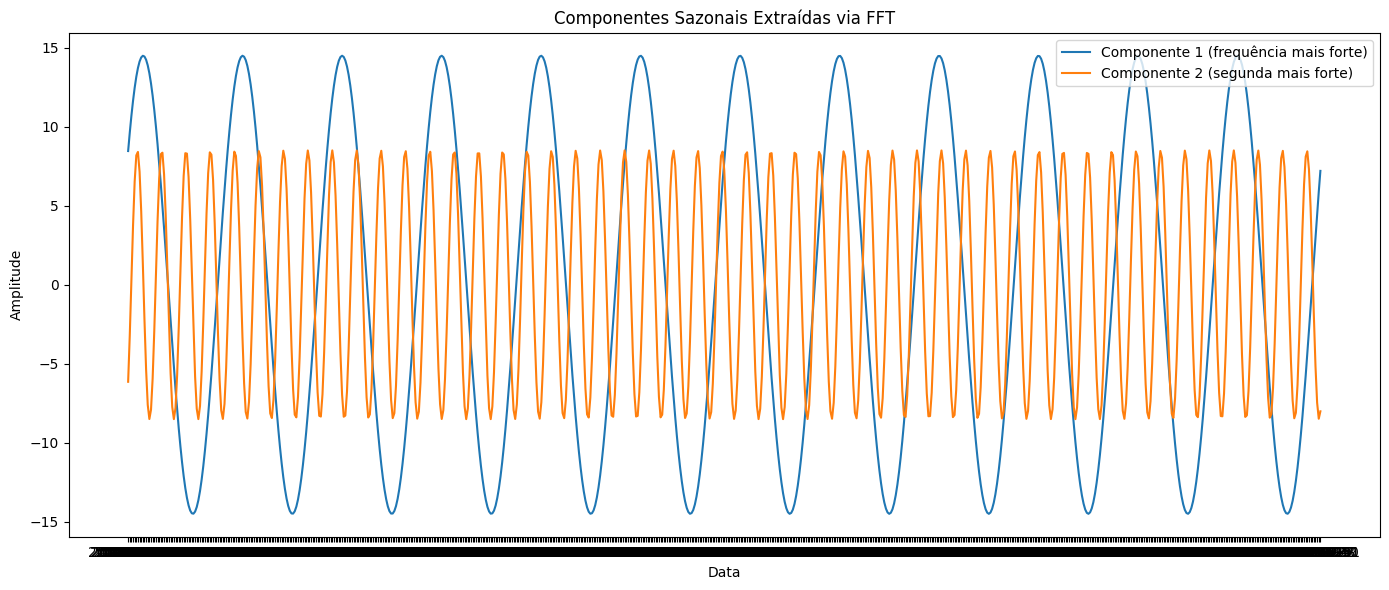

In [58]:
# Plotar os componentes
plt.figure(figsize=(14, 6))
plt.plot(df['data'], componentes[0], label="Componente 1 (frequência mais forte)")
plt.plot(df['data'], componentes[1], label="Componente 2 (segunda mais forte)")
plt.title("Componentes Sazonais Extraídas via FFT")
plt.xlabel("Data")
plt.ylabel("Amplitude")
plt.legend()
plt.tight_layout()
plt.show()

Abaixo estamos plotando as ondas puras com os dados originais.

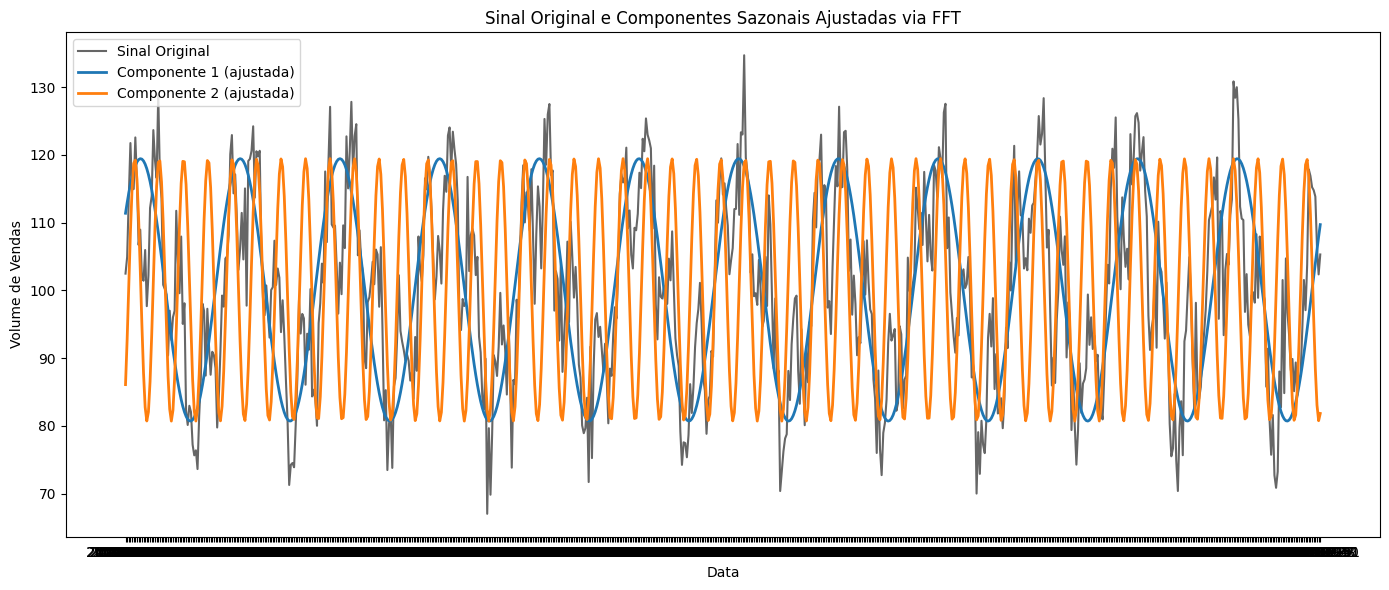

In [59]:
# Ajusta escala e média das componentes para a do sinal original
mean_original = np.mean(vendas)
std_original = np.std(vendas)

comp_adjusted = []
for comp in componentes:
    comp_centered = comp - np.mean(comp)
    comp_scaled = comp_centered / np.std(comp_centered) * std_original
    comp_final = comp_scaled + mean_original
    comp_adjusted.append(comp_final)

# Plotando tudo junto
plt.figure(figsize=(14,6))
plt.plot(df['data'], vendas, label="Sinal Original", color='black', alpha=0.6)
plt.plot(df['data'], comp_adjusted[0], label="Componente 1 (ajustada)", linewidth=2)
plt.plot(df['data'], comp_adjusted[1], label="Componente 2 (ajustada)", linewidth=2)
plt.title("Sinal Original e Componentes Sazonais Ajustadas via FFT")
plt.xlabel("Data")
plt.ylabel("Volume de Vendas")
plt.legend()
plt.tight_layout()
plt.show()
